# Bayes Naïf

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split

In [118]:
IMAGE_SIZE = 64

X = np.load("./data/X.npy")
X = X.reshape(len(X), 64*64) # mise a plat de l image

y_ = np.load("./data/Y.npy")

# Équivalence encodage/traduction
dic_equiv = {0:9, 1:0, 2:7, 3:6, 4:1, 5:8, 6:4, 7:3, 8:2 , 9:5} 

y = np.zeros(len(y_))
for k in range(len(y)):
    a = y_[k]
    y[k] = int(dic_equiv[np.where(a==1)[0][0]])
y = y.astype(int)

Le score du modèle est: 0.61


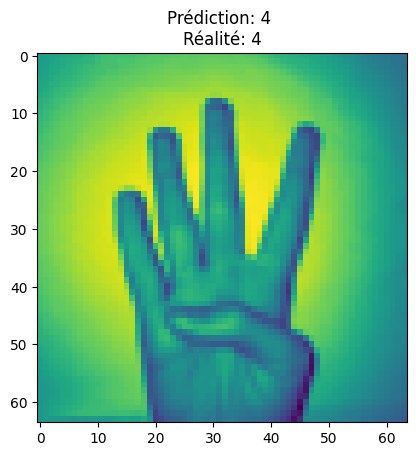

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Gaussien pour traiter nos données qui sont des pixels
cat = GaussianNB()
cat.fit(X_train, y_train)

score = cat.score(X_test, y_test)

print(f"Le score du modèle est: {score:.2f}")

prediction = cat.predict([X_test[0]])
plt.imshow(X_test[0].reshape((IMAGE_SIZE, IMAGE_SIZE)))
plt.title(f"Prédiction: {prediction[0]} \nRéalité: {y_test[0]}")
plt.show()